# Sample 15arc-sec GEBCO_2023.nc on OM5 grid

## Apply edits to the topography.

In [251]:
# Notebook editor: Brandon.Reichl

# This notebook originated from Stephen Griffies, with many other contributors:
# Stephen.Griffies
# Alistair.Adcroft
# Robert.Hallberg
# Niki.Zadeh
# Raphael.Dussin

In [252]:
Region_Boundaries = [-90,90,-300,60]
Region_Name = '25: Global Deep Ocean Channels'

In [253]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import xarray as xr
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
sys.path.insert(1, './tools/')
from topo_tools import *

In [331]:
plot_all = False # switch to True to show intermediate/less interesting plots as well

### Overview of three bathymetry products

In [255]:
# GEBCO-2020 + Bedmachine combined topography 

fname_gebco  = "/archive/gold/datasets/topography/GEBCO_2023/GEBCO_2023.nc"

GEBCO = GEBCO_data(fname_gebco)

if plot_all:
    plt.figure(figsize=(20,8))
    plt.pcolormesh(GEBCO.lonq[::100], GEBCO.latq[::100], GEBCO.depth[::100,::100], cmap=cmocean.cm.deep)
    plt.colorbar(); plt.title('GEBCO (subsampled)');

Resolution = 240 cells/degree
GEBCO loaded with (nj,ni) =  (43200, 86400)  min(lon) =  -300.0  max(lon) =  60.0


In [256]:
OM4 = OM4_data('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_hgrid.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_static.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_mask.nc')
if plot_all:
    plt.figure(figsize=(20,8))
    plt.pcolormesh(OM4.lonq, OM4.latq, OM4.depth, cmap=cmocean.cm.deep)
    plt.colorbar(); plt.title('OM4 topography (after run-time edits)');
    plt.grid(True, alpha=0.4)

In [257]:
OM5 = OM5_data('/archive/jpk/OM5/OM5_025/prototypes/v20231109/tile_files/ocean_hgrid.nc',
               '/archive/jpk/OM5/OM5_025/prototypes/v20231109/tile_files/ocean_topog_merged.nc')

if plot_all:
    plt.figure(figsize=(20,8))
    plt.pcolormesh(OM5.lonq, OM5.latq, OM5.depth, cmap=cmocean.cm.deep, vmin=2500, vmax=5500)
    plt.colorbar(); plt.title('OM5 base topography (before edits)');
    plt.grid(True, alpha=0.4)

OM5 longitudes are inconsistent!
OM5 latitudes are inconsistent!


# Edits to narrow channels mentioned in the bottom water pathways described within sections 3.3.3 and 3.3.4 of Paige Lavin's PhD thesis

[Lavin's PhD thesis](https://digital.lib.washington.edu/researchworks/handle/1773/47664) produces a new climatology for global bottom waters (based on all availably hydrography) and uses these to infer circulation pathways for bottom waters. Below, I have listed all mentions of passages, channels, gaps, and straits, in the order that they appear in the text.

In [258]:
plt.rcParams['figure.dpi'] = 60

## 3.3.3.1 Antarctic sourced pathways in the Atlantic Ocean

### Orkney Passage (-42, -61)
Deepened the sill depth


In [259]:
region = Region(-41, -61, width_lon=20., width_lat=5.)
if plot_all:
    map_region(region, 2000, 4500, GEBCO, OM4, OM5, '', gebco_contours=[3250.0], text_depths=False);

Gebco (js:je,is:ie) = 6839:7199,61739:62099
OM4 model (js:je,is:ie) = 188:202,1027:1035
OM5 model (js:je,is:ie) = 269:283,1027:1035
Using xlim = (-42.75, -41.25) ylim = (-61.5, -60.0)


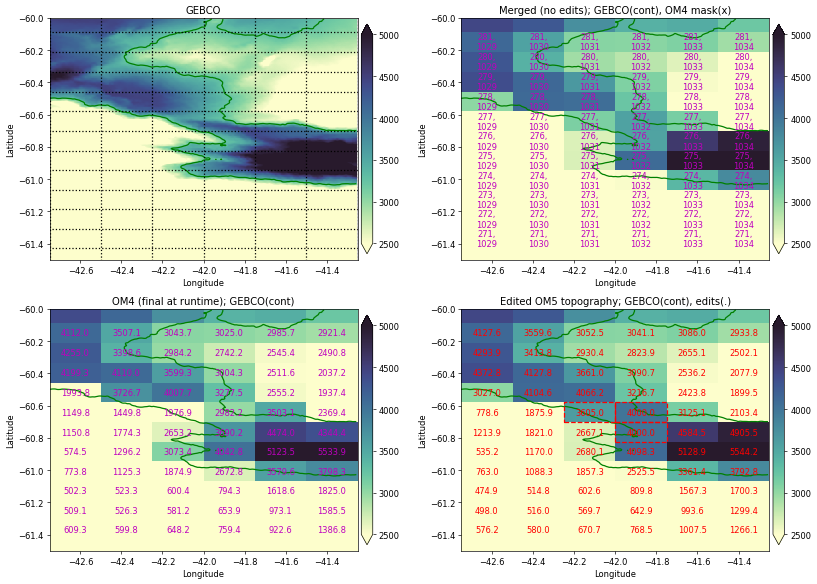

In [260]:
OM5.depth[277,1031]=3605.
OM5.depth[277,1032]=4000.
OM5.depth[276,1032]=4000.

sill_check = [[-41.6, -60.9, -42.4, -60.5]]
region = Region(-42., -60.75, width_lon=1.5, width_lat=1.5)
map_region(region, 2500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[3250.0], text_depths=True)#, sill_check=sill_check);

### Shackleton Fracture Zone

Made the ridge shallower.

In [261]:
region = Region(-60.5, -59, width_lon=8, width_lat=8)
if plot_all:
    map_region(region, 2500, 4500, GEBCO, OM4, OM5, '', gebco_contours=[3200.0], text_depths=False);

In [262]:
OM5.depth[287,959]=2700.
OM5.depth[288,958]=2700.
OM5.depth[289,958]=2700.
OM5.depth[290,957]=2700.
OM5.depth[290,956]=2700.
OM5.depth[291,955]=2700.
OM5.depth[292,955]=2700.

region = Region(-60.5, -59, width_lon=2., width_lat=1.5)
if plot_all:
    map_region(region, 2500, 4500, GEBCO, OM4, OM5, '', gebco_contours=[3200.0], text_depths=True);

Gebco (js:je,is:ie) = 6869:7289,57869:58529
OM4 model (js:je,is:ie) = 189:205,963:976
OM5 model (js:je,is:ie) = 270:286,963:976
Using xlim = (-58.875, -56.125) ylim = (-61.375, -59.625)


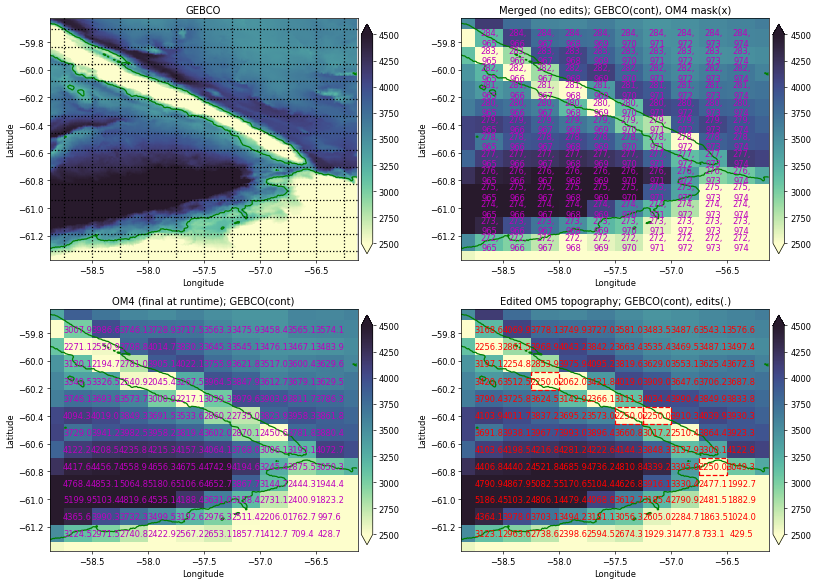

In [263]:
OM5.depth[276,973]=2250.
OM5.depth[279,971]=2250.
OM5.depth[279,970]=2250.
OM5.depth[281,967]=2250.

region = Region(-57.5, -60.5, width_lon=2.75, width_lat=1.75)
map_region(region, 2500, 4500, GEBCO, OM4, OM5, '', gebco_contours=[3200.0], text_depths=True);

### Georgia Passage (-31, -56)

Looks fine.

In [264]:
region = Region(-31, -56, width_lon=2., width_lat=2.)
if plot_all:
    map_region(region, 3000, 4500, GEBCO, OM4, OM5, '', gebco_contours=[3200.0], text_depths=False);

### South Sandwich Trench (-23.5, -61)

Dug out South Sandwich trench

In [265]:
region = Region(-25., -58.5, width_lon=15, width_lat=15)
if plot_all:
    map_region(region, 3000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[4500.0], text_depths=False);

Gebco (js:je,is:ie) = 6749:7169,65939:66779
OM4 model (js:je,is:ie) = 185:201,1097:1113
OM5 model (js:je,is:ie) = 266:282,1097:1113
Using xlim = (-25.25, -21.75) ylim = (-61.875, -60.125)


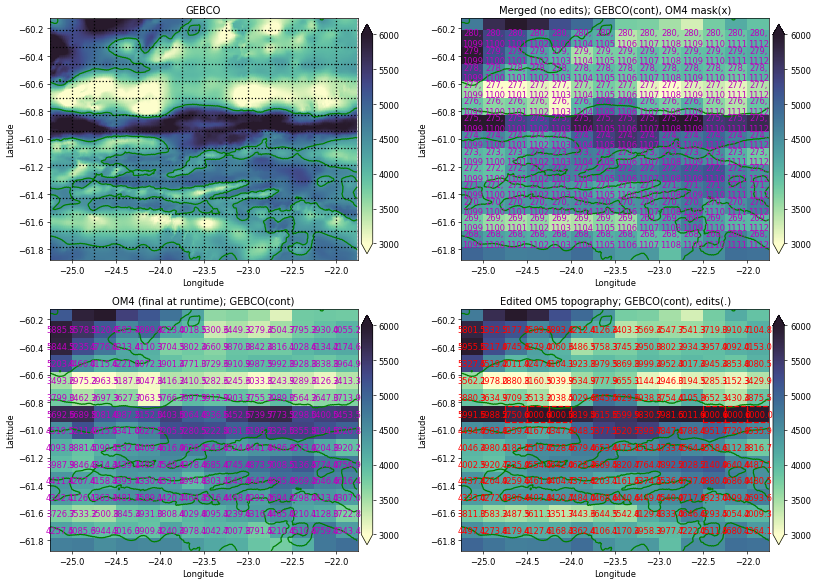

In [266]:
OM5.depth[275,1101]=5750.
OM5.depth[275,1102]=6000.
OM5.depth[275,1103]=6000.
OM5.depth[275,1110]=6000.
OM5.depth[275,1111]=6000.
OM5.depth[275,1112]=6000.

region = Region(-23.5, -61., width_lon=3.5, width_lat=1.75)
map_region(region, 3000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[4500.0], text_depths=True);

### Deep sills along boundary between Georgia Basin and Argentine Basin

Made sill shallower to correctly block meridional flow

In [267]:
region = Region(-32., -52, width_lon=20, width_lat=8)
if plot_all:
    map_region(region, 3000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[4750.0], text_depths=False);

Gebco (js:je,is:ie) = 9605:10025,62489:63509
OM4 model (js:je,is:ie) = 271:283,1040:1059
OM5 model (js:je,is:ie) = 352:364,1040:1059
Using xlim = (-39.625, -35.375) ylim = (-49.975, -48.225)


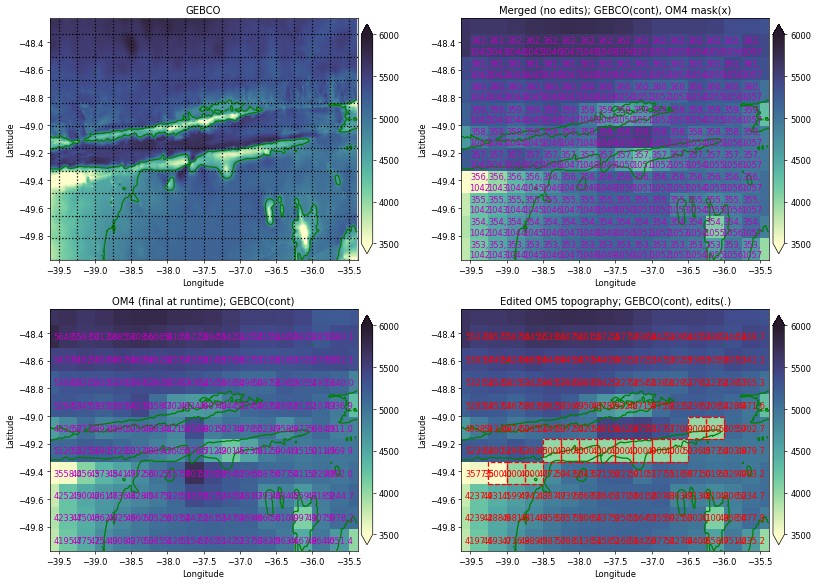

In [268]:
OM5.depth[356,1043] = 3500.
OM5.depth[356,1044] = 4000.
OM5.depth[356,1045] = 4000.
OM5.depth[357,1046] = 4000.
OM5.depth[357,1047] = 4000.
OM5.depth[357,1048] = 4000.
OM5.depth[357,1049] = 4000.
OM5.depth[357,1050] = 4000.
OM5.depth[357,1051] = 4000.
OM5.depth[357,1052] = 4000.
OM5.depth[357,1053] = 4000.
OM5.depth[358,1054] = 4000.
OM5.depth[358,1055] = 4000.

region = Region(-37.5, -49.1, width_lon=4.25, width_lat=1.75)
map_region(region, 3500, 6000, GEBCO, OM4, OM5, '', gebco_contours=[4750.0], text_depths=True);

In [269]:
OM5.depth[347,1062]=5000.

region = Region(-35., -50.5, width_lon=2.5, width_lat=1.75)
if plot_all:
    map_region(region, 3000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[4750.0], text_depths=True);

### Vema Channel

In [270]:
region = Region(-39, -30, width_lon=4, width_lat=6)
if plot_all:
    map_region(region, 4250, 4900, GEBCO, OM4, OM5, '', gebco_contours=[4500.0], text_depths=False);

In [271]:
OM5.depth[447, 1041]=4700.
OM5.depth[448, 1041]=4700.
OM5.depth[448, 1042]=4700.
OM5.depth[449, 1042]=4700.
OM5.depth[450, 1042]=4700.
OM5.depth[451, 1042]=4700.
OM5.depth[452, 1042]=4700.
OM5.depth[453, 1042]=4700.
OM5.depth[454, 1042]=4700.
OM5.depth[455, 1042]=4700.
OM5.depth[455, 1041]=4700.

region = Region(-39.5, -32, width_lon=1.5, width_lat=2.5)
if plot_all:
    map_region(region, 4250, 4900, GEBCO, OM4, OM5, '', gebco_contours=[4500.0], text_depths=True);

In [272]:
OM5.depth[456, 1042]=4700.
OM5.depth[457, 1042]=4700.
OM5.depth[458, 1042]=4700.
OM5.depth[459, 1042]=4700.
OM5.depth[460, 1042]=4700.
OM5.depth[461, 1042]=4700.
OM5.depth[461, 1043]=4700.
OM5.depth[462, 1043]=4700.
OM5.depth[462, 1044]=4700.
OM5.depth[463, 1044]=4700.
OM5.depth[463, 1045]=4700.
OM5.depth[463, 1046]=4700.
OM5.depth[464, 1046]=4700.
OM5.depth[465, 1046]=4700.
OM5.depth[465, 1047]=4700.
OM5.depth[466, 1047]=4700.
OM5.depth[466, 1048]=4700.
OM5.depth[467, 1048]=4700.
OM5.depth[467, 1049]=4700.
OM5.depth[467, 1050]=4700.


region = Region(-38.5, -29.5, width_lon=2.25, width_lat=3.25)
if plot_all:
    map_region(region, 4250, 4900, GEBCO, OM4, OM5, '', gebco_contours=[4500.0], text_depths=True);

Gebco (js:je,is:ie) = 13679:15119,62159:63119
OM4 model (js:je,is:ie) = 362:392,1034:1052
OM5 model (js:je,is:ie) = 443:473,1034:1052
Using xlim = (-41.0, -37.0) ylim = (-33.0, -27.0)


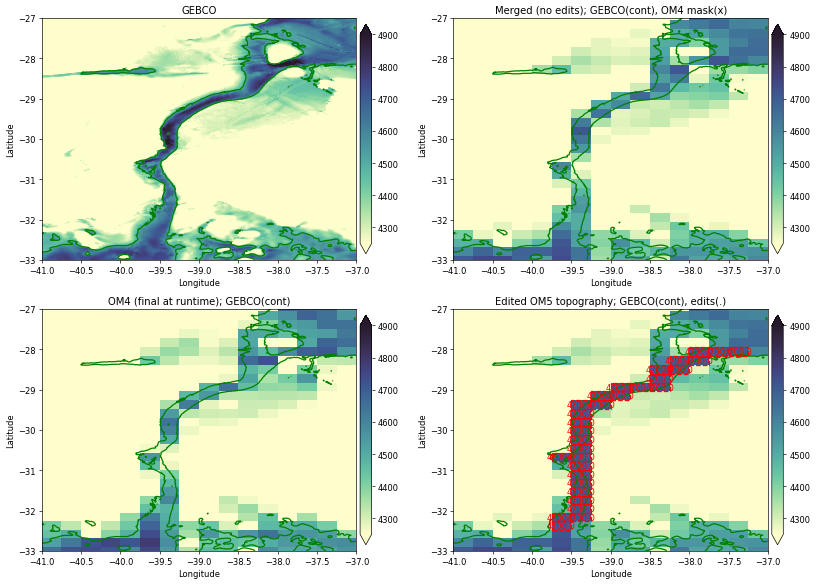

In [273]:
region = Region(-39, -30, width_lon=4, width_lat=6)
map_region(region, 4250, 4900, GEBCO, OM4, OM5, '', gebco_contours=[4500.0], text_depths=False);

### Hunter Channel

Note: Hunter channel is not the zonal fracture zone cutting through part the Rio Grande Ridge! It is instead the meridional passage through the rough topography around 28.5º W.

This was pretty messy to edit, but I tried to ensure the two narrow and deep passages were adequately connected.

In [274]:
region = Region(-30.5, -34.5, width_lon=12.5, width_lat=12.5)
if plot_all:
    map_region(region, 3500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);

Gebco (js:je,is:ie) = 12959:13679,65189:65849
OM4 model (js:je,is:ie) = 347:364,1085:1098
OM5 model (js:je,is:ie) = 428:445,1085:1098
Using xlim = (-28.375, -25.625) ylim = (-36.0, -33.0)


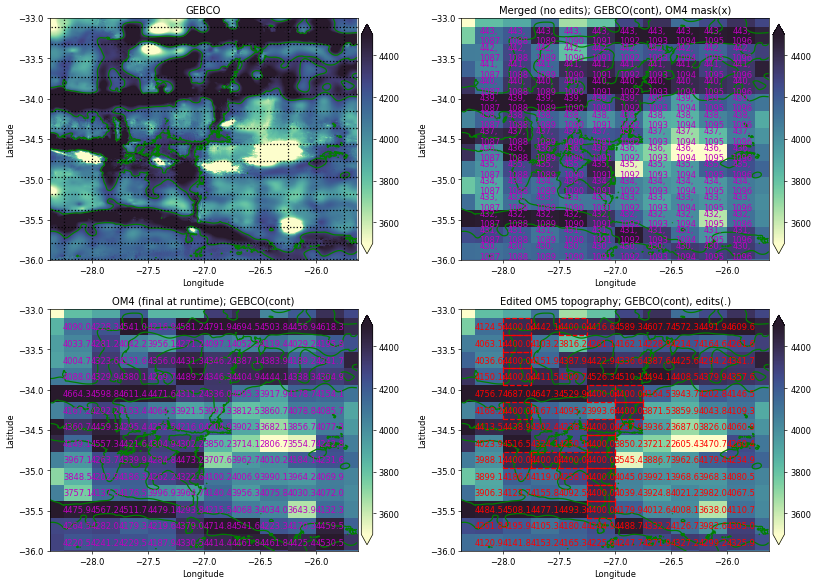

In [275]:
OM5.depth[432, 1091]=4400.
OM5.depth[433, 1091]=4400.
OM5.depth[434, 1091]=4400.
OM5.depth[435, 1091]=4400.

OM5.depth[435, 1090]=4400.
OM5.depth[435, 1089]=4400.
OM5.depth[435, 1088]=4400.

OM5.depth[438, 1088]=4400.
OM5.depth[440, 1088]=4400.
OM5.depth[441, 1088]=4400.
OM5.depth[442, 1088]=4400.
OM5.depth[443, 1088]=4400.
OM5.depth[443, 1088]=4400.
OM5.depth[443, 1090]=4400.

OM5.depth[439, 1091]=4400.

OM5.depth[436, 1091]=4400.
OM5.depth[437, 1091]=4400.
OM5.depth[438, 1092]=4400.
OM5.depth[439, 1092]=4400.

region = Region(-27.0, -34.5, width_lon=2.75, width_lat=3.)
map_region(region, 3500, 4500, GEBCO, OM4, OM5, '', gebco_contours=[4300.0], text_depths=True);

In [276]:
OM5.depth[447, 1098]=4400.
OM5.depth[447, 1099]=4400.

region = Region(-27.0, -34.5, width_lon=6, width_lat=7.5)
if plot_all:
    map_region(region, 3500, 4500, GEBCO, OM4, OM5, '', gebco_contours=[4300.0], text_depths=False);

### Romanche and Chain Fracture Zones

The Romanche Fracture Zone is the deepest exchange pathway for bottom waters in the central Atlantic, with a throughflow of ~1.3 Sv (Polzin 1996). It is very poorly represented in OM5 (and OM4), so it probably worth fixing it up.

In [277]:
region = Region(-18, -1, width_lon=12, width_lat=8)
if plot_all:
    map_region(region, 3000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);

In [278]:
OM5.depth[581, 1105:1107] = 3000
OM5.depth[581, 1107:1112] = 3250
OM5.depth[582, 1112:1117] = 3250
OM5.depth[583, 1117:1119] = 3250

OM5.depth[579, 1109] = 4750
OM5.depth[580, 1111] = 4750
OM5.depth[580, 1112] = 5000
OM5.depth[581, 1112] = 4750
OM5.depth[581, 1113:1118] = 5500
OM5.depth[582, 1117:1119] = 5500

OM5.depth[580, 1113:1118] = 3000
OM5.depth[581, 1118] = 3000

region = Region(-22, -0.75, width_lon=3.5, width_lat=2.5)
if plot_all:
    map_region(region, 3000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=True);

In [279]:
OM5.depth[583, 1119:1122] = 3500
OM5.depth[584, 1122:1126] = 3500
OM5.depth[585, 1126:1128] = 3000

OM5.depth[582-1, 1119:1123] = 3000
OM5.depth[583-1, 1123:1128] = 3000
OM5.depth[584-1, 1128:1132] = 3000
OM5.depth[585-1, 1132:1134] = 3000

OM5.depth[582, 1121] = 4500
OM5.depth[582, 1122] = 5500
OM5.depth[583, 1122:1128] = 5500
OM5.depth[584, 1127:1132] = 5500
OM5.depth[585, 1131:1134] = 5250

region = Region(-18.5, -0.5, width_lon=3.75, width_lat=2.5)
if plot_all:
    map_region(region, 3000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[4250.0], text_depths=True);

In [280]:
OM5.depth[586, 1133:1135] = 2750
OM5.depth[585, 1134:1136] = 5000
OM5.depth[586, 1135:1143] = 4750

region = Region(-15.5, 0.5, width_lon=3.5, width_lat=2.5)
if plot_all:
    map_region(region, 3000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[4250.0], text_depths=True);

Gebco (js:je,is:ie) = 21119:21839,66239:68639
OM4 model (js:je,is:ie) = 494:508,1102:1144
OM5 model (js:je,is:ie) = 575:589,1102:1144
Using xlim = (-24.0, -14.0) ylim = (-2.0, 1.0)


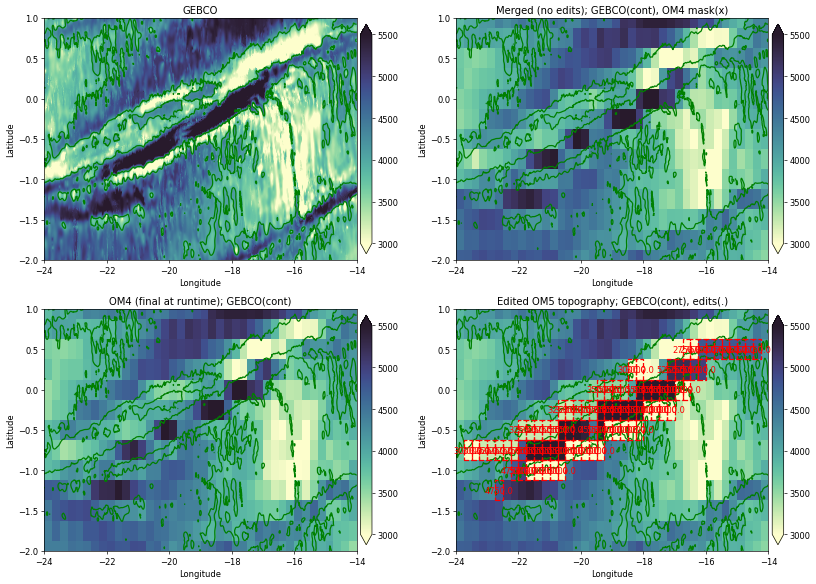

In [281]:
region = Region(-19, -0.5, width_lon=10, width_lat=3)
map_region(region, 3000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);

In [282]:
# Only 0.1 Sv goes through the Chain Fracture Zone, so it doesn't seem worth it.

region = Region(-16, -2, width_lon=3.25, width_lat=2.5)
if plot_all:
    map_region(region, 3000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[4300.0], text_depths=True);

### Narrow channel between Ceará Abyssal Plain and Brazil Basin
Looks just fine already.

In [283]:
region = Region(-36, 0, width_lon=20, width_lat=10)
if plot_all:
    map_region(region, 3000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);

### Equatorial channel (-40, 3)
I think this must be a typo and Lavin means this channel at 1º?

In [284]:
region = Region(-40, 1, width_lon=3, width_lat=2.5)
if plot_all:
    map_region(region, 3000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=True);

### Outflow of Brazil Basin at (-44, 8.5)

Depth gradients are small and smooth enough that this is probably okay already.

In [285]:
region = Region(-44, 8.5, width_lon=10, width_lat=5)
if plot_all:
    map_region(region, 3500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);

### Vema Fracture Zone (-44, 11)

In [286]:
region = Region(-42.5, 11, width_lon=12, width_lat=4)
if plot_all:
    map_region(region, 3500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);

In [287]:
OM5.depth[628,1016:1029] = 5500.
OM5.depth[627,1024:1029] = 3250.

region = Region(-44.5, 10.75, width_lon=3.5, width_lat=2)
if plot_all:
    map_region(region, 3500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=True);

In [288]:
OM5.depth[627:629, 1029] = 5500
OM5.depth[627, 1029:1043] = 5500
OM5.depth[627, 1035:1037] = 4750

OM5.depth[626, 1029:1034] = 3250

region = Region(-41.5, 10.75, width_lon=4, width_lat=2)
if plot_all:
    map_region(region, 3500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=True);

Gebco (js:je,is:ie) = 23759:24719,60359:63239
OM4 model (js:je,is:ie) = 538:556,1004:1054
OM5 model (js:je,is:ie) = 619:637,1004:1054
Using xlim = (-48.5, -36.5) ylim = (9.0, 13.0)


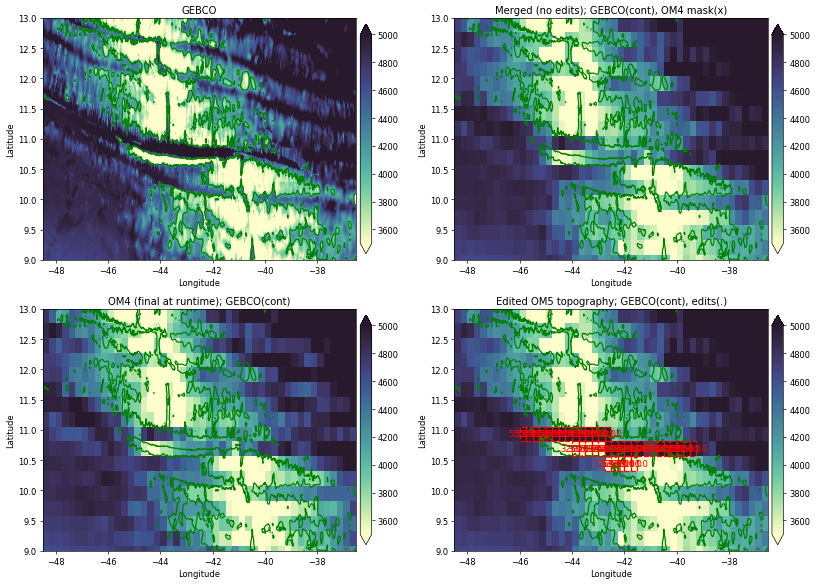

In [289]:
region = Region(-42.5, 11, width_lon=12, width_lat=4)
map_region(region, 3500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);

### Puerto Rico Trench (-65, 20)

Looks okay as is, and is a dead end for bottom waters so not as important as throughflow passages.

In [290]:
region = Region(-64, 18, width_lon=12, width_lat=9)
if plot_all:
    map_region(region, 3500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);map_region(region, 3500, 8000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);

### East Azores Fracture Zone (-XX, 37)

Looks fine.

In [291]:
region = Region(-20, 37., width_lon=30, width_lat=12)
if plot_all:
    map_region(region, 3500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);map_region(region, 3000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);

In [292]:
region = Region(-13, 36.5, width_lon=3, width_lat=2)
if plot_all:
    map_region(region, 3500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);map_region(region, 3000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=True);

### Corner Rise Seamounts (-50, 32)

Looks okay.

In [293]:
region = Region(-50, 35, width_lon=12, width_lat=6)
if plot_all:
    map_region(region, 3500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);map_region(region, 3500, 8000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);

### Gaps in Southern Mid-Atlantic Ridge (e.g. at (-8, -50))

Looks fine since these gaps do not cut very cleanly through the ridge and since bathymetric gradients are fairly small anyways.

In [294]:
region = Region(-12, -49, width_lon=20, width_lat=12)
if plot_all:
    map_region(region, 3500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[3250.0], text_depths=False);

Gebco (js:je,is:ie) = 9419:10019,69119:70079
OM4 model (js:je,is:ie) = 266:283,1150:1168
OM5 model (js:je,is:ie) = 347:364,1150:1168
Using xlim = (-12.0, -8.0) ylim = (-50.75, -48.25)


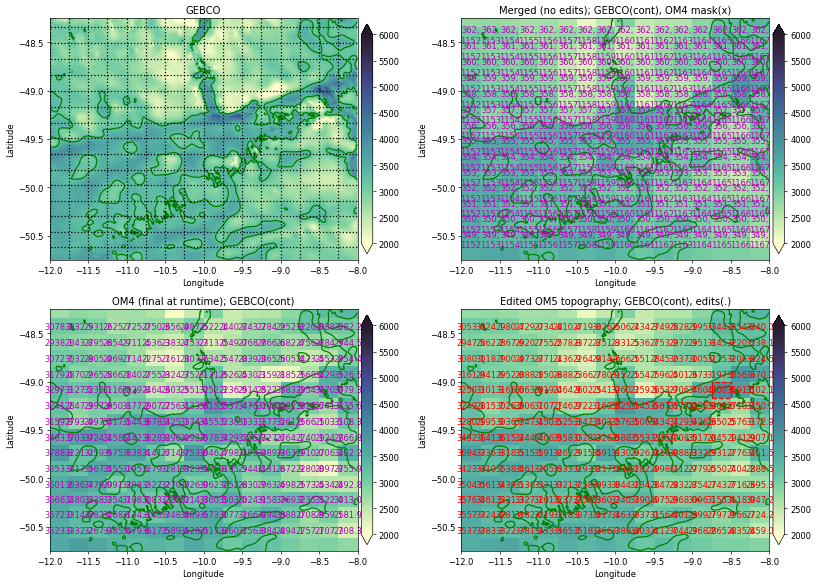

In [295]:
# Very minor edit
OM5.depth[358, 1165] = 4000.

region = Region(-10, -49.5, width_lon=4, width_lat=2.5)
map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[3250.0], text_depths=True);

In [296]:
region = Region(-13, -47.5, width_lon=5, width_lat=3)
if plot_all:
    map_region(region, 3500, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000.0], text_depths=False);map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[3500.0], text_depths=False);

### Gap between Discovery Seamounts and Agulhas Ridge

Very well resolved

In [297]:
region = Region(0.2, -42, width_lon=24, width_lat=8)
if plot_all:
    map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[3500.0], text_depths=False);

In [298]:
region = Region(15, -40, width_lon=24, width_lat=8)
if plot_all:
    map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[3500.0], text_depths=False);

### Gaps in Walvis Ridge at (-7, -36) and (-3, -32)

Looks okay.

In [299]:
region = Region(-0, -32, width_lon=24, width_lat=15)
if plot_all:
    map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[3500.0], text_depths=False);

## 3.3.3.2 Antarctic sourced pathways in the Indian Ocean

### Gaps in Southwest Indian Ridge (30, -50)

In [300]:
region = Region(30, -50, width_lon=16, width_lat=10)
if plot_all:
    map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[3500.0], text_depths=False);

Gebco (js:je,is:ie) = 8579:9059,77879:78359
OM4 model (js:je,is:ie) = 243:258,1296:1306
OM5 model (js:je,is:ie) = 324:339,1296:1306
Using xlim = (24.5, 26.5) ylim = (-54.25, -52.25)


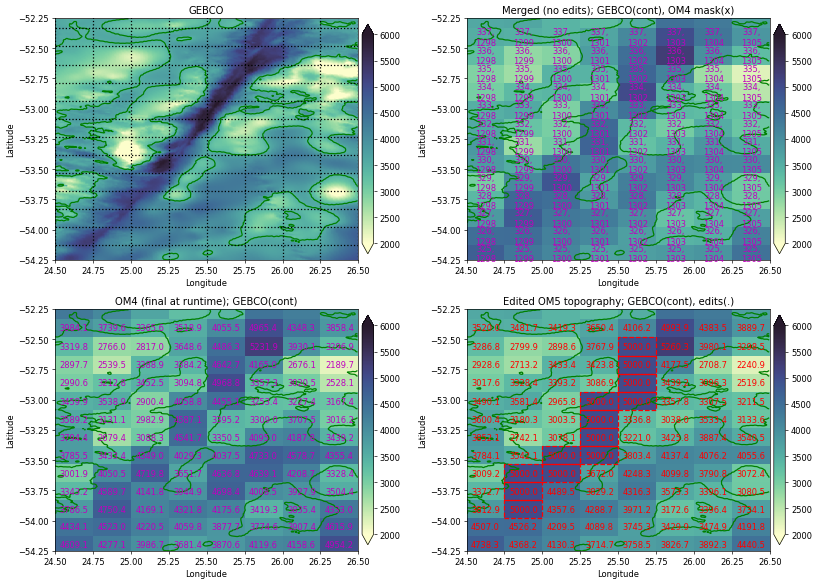

In [301]:
j,i = 327, 1299
OM5.depth[j,i] = 5000
OM5.depth[j+1,i] = 5000
OM5.depth[j+2,i] = 5000
OM5.depth[j+2,i+1] = 5000
OM5.depth[j+3,i+1] = 5000
OM5.depth[j+3,i+2] = 5000
OM5.depth[j+4,i+2] = 5000
OM5.depth[j+5,i+2] = 5000
OM5.depth[j+6,i+2] = 5000
OM5.depth[j+6,i+3] = 5000
OM5.depth[j+7,i+3] = 5000
OM5.depth[j+8,i+3] = 5000
OM5.depth[j+9,i+3] = 5000

region = Region(25.5, -53.25, width_lon=2, width_lat=2)
map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[3500.0], text_depths=True);

### Prince Edward Fracture Zone (35, ?)

In [302]:
region = Region(30, -50, width_lon=24, width_lat=16)
if plot_all:
    map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[3500.0], text_depths=False);

### Mozambique Channel (between Madagascar and African continent)

In [303]:
region = Region(40, -17, width_lon=16, width_lat=12)
if plot_all:
    map_region(region, 1500, 4500, GEBCO, OM4, OM5, '', gebco_contours=[2600.0], text_depths=False);

In [304]:
OM5.depth[525, 1366] = 2600.

region = Region(41.5, -14.5, width_lon=2.5, width_lat=2)
if plot_all:
    map_region(region, 1500, 4500, GEBCO, OM4, OM5, '', gebco_contours=[2600.0], text_depths=True);

Gebco (js:je,is:ie) = 7679:11519,76319:82079
OM4 model (js:je,is:ie) = 216:319,1270:1368
OM5 model (js:je,is:ie) = 297:400,1270:1368
Using xlim = (18.0, 42.0) ylim = (-58.0, -42.0)


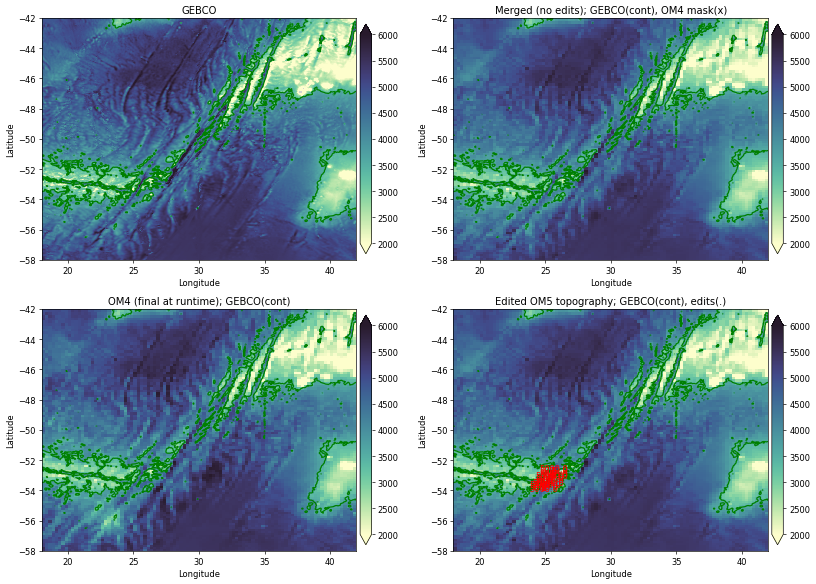

In [305]:
region = Region(30, -50, width_lon=24, width_lat=16)
map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[3500.0], text_depths=False);

### Sill between Crozet and Kerguelen islands

In [306]:
region = Region(50.5, -45, width_lon=16, width_lat=12)
if plot_all:
    map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[3500.0], text_depths=False);map_region(region, 1500, 6000, GEBCO, OM4, OM5, '', gebco_contours=[2750.0], text_depths=False);

### Atlantis II Fracture Zone (57, ?), Melville Fracture Zone (60.5), Indomed Fracture Zone (46)

In [307]:
region = Region(55., -34, width_lon=10, width_lat=10)
if plot_all:
    map_region(region, 2000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[2750.0], text_depths=False);

In [308]:
OM5.depth[418:430, 1409] = 4250
OM5.depth[424:430, 1409] = 5500

region = Region(52.1, -37, width_lon=2, width_lat=3)
if plot_all:
    map_region(region, 2000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[2750.0], text_depths=True);

In [309]:
OM5.depth[423:438, 1413] = 4250

region = Region(53.5, -35.75, width_lon=2, width_lat=3)
if plot_all:
    map_region(region, 2000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[2750.0], text_depths=True);

In [310]:
OM5.depth[435:460, 1428] = 4250

region = Region(57, -33, width_lon=2, width_lat=8)
if plot_all:
    map_region(region, 2000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[2750.0], text_depths=False);

Gebco (js:je,is:ie) = 12239:14639,83999:86399
OM4 model (js:je,is:ie) = 332:383,1398:1440
OM5 model (js:je,is:ie) = 413:464,1398:1440
Using xlim = (50.0, 60.0) ylim = (-39.0, -29.0)


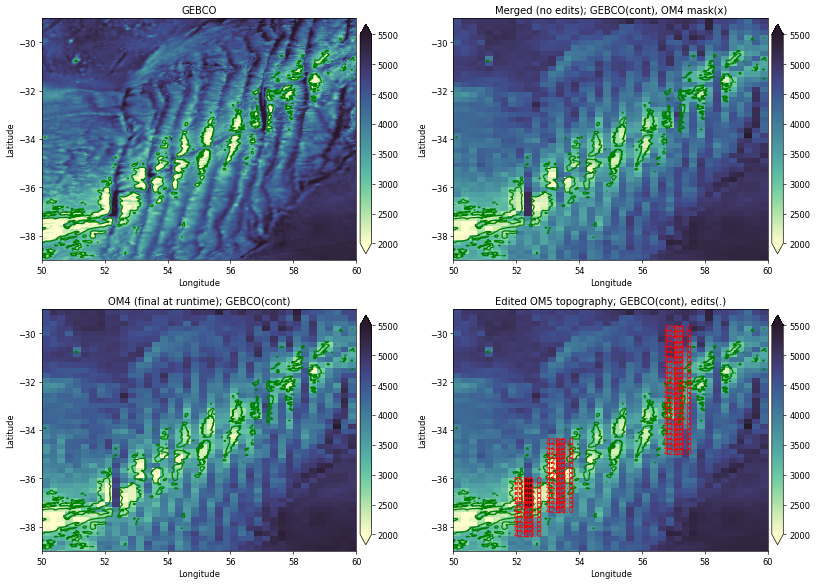

In [311]:
region = Region(55., -34, width_lon=10, width_lat=10)
map_region(region, 2000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[2750.0], text_depths=False);

### Owen Fracture Zone (57, 10)

Gebco (js:je,is:ie) = 23699:24299,85259:86099
OM4 model (js:je,is:ie) = 537:549,1419:1435
OM5 model (js:je,is:ie) = 618:630,1419:1435
Using xlim = (55.25, 58.75) ylim = (8.75, 11.25)


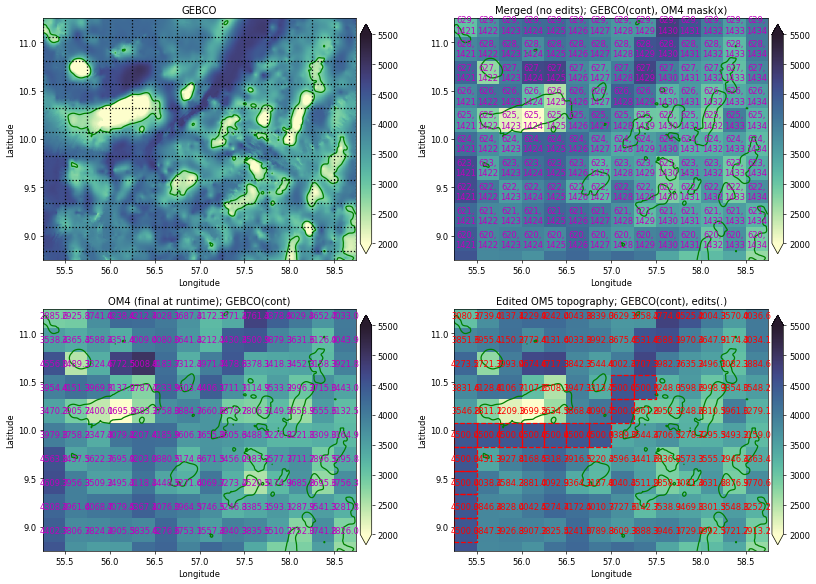

In [312]:
OM5.depth[620:625,1421] = 4500
OM5.depth[624,1421:1428] = 4500
OM5.depth[625,1428] = 4500
OM5.depth[626,1428] = 4500
OM5.depth[626,1429] = 4500

region = Region(57, 10, width_lon=3.5, width_lat=2.5)
map_region(region, 2000, 5500, GEBCO, OM4, OM5, '', gebco_contours=[2750.0], text_depths=True);

### Deep Fracture Zones (125-127, ?) between Australian-Antarctic Discordance and South Australian Basin 

### Deep gap between Broken and Naturaliste plateaus (103-108, -33)

### Narrow channel along eastern flank of the Ninetyeast Ridge (90, 12)

### Gaps in Ninetyeast Ridge at (90, -5), (90, -10), (90, -28)

## 3.3.3.3 Antarctic sourced pathways in the Pacific Ocean

### Fracture Zones bisecting the Southeast Indian Ridge (150-160, -62), especially Balleny (155)

Seems to be fine.

In [313]:
region = Region(155-360, -62, width_lon=8, width_lat=8)
if plot_all:
    map_region(region, 2000, 3500, GEBCO, OM4, OM5, '', gebco_contours=[5000], text_depths=False);

### Gaps in the Pacific-Antarctic Ridge south and southwest of Campbell Plateau

### Gaps in Louisville Ridge east of Chatham Rise

### Gap at (-163.5, -42)

### Samoan Passage

In [314]:
## Samoan passage
sill_check = [[-169, -9.5, -168.7, -8.5], [-168.7, -8.5, -168.7, -7.75]] # [lonA,latA,lonB,latB]

region = Region(-165, -10, width_lon=10, width_lat=10)
if plot_all:
    map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[5000], text_depths=False);

region = Region(-169, -9, width_lon=1.5, width_lat=3)
if plot_all:
    map_region(region, 3500, 5500, GEBCO, OM4, OM5, '', gebco_contours=[5000],text_depths=True, sill_check=sill_check);

Gebco (js:je,is:ie) = 19079:19799,31259:31619
OM4 model (js:je,is:ie) = 460:474,519:527
OM5 model (js:je,is:ie) = 541:555,519:527
Using xlim = (-169.75, -168.25) ylim = (-10.5, -7.5)


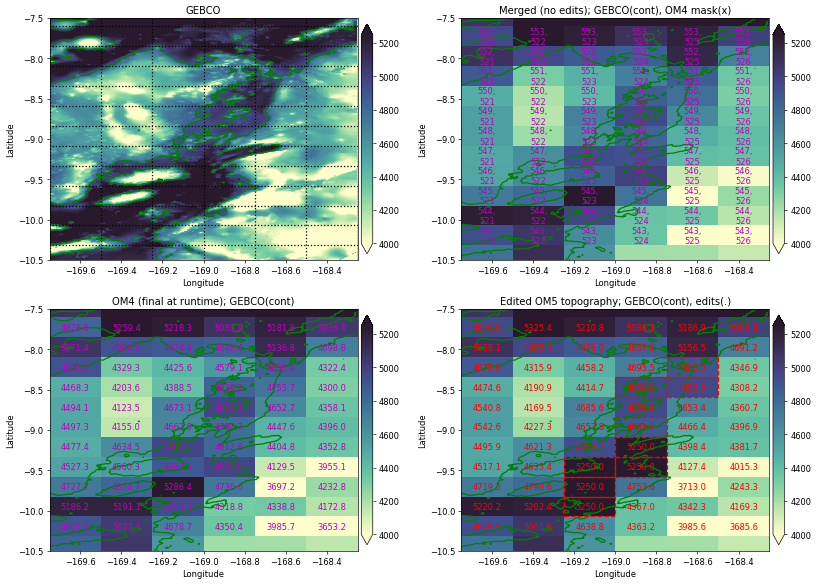

In [315]:
## Samoan passage

OM5.depth[544,523]=5250.
OM5.depth[545,523]=5250.
OM5.depth[546,523]=5250.
OM5.depth[546,524]=5250.
OM5.depth[547,524]=5250.
OM5.depth[548,524]=4881.
OM5.depth[550,524]=4950.
OM5.depth[550,525]=4950.
OM5.depth[551,525]=4900.

region = Region(-169, -9, width_lon=1.5, width_lat=3)
map_region(region, 4000, 5250, GEBCO, OM4, OM5, '', gebco_contours=[4881.0], text_depths=True);

### Gap in Robbie Ridge

Channel not sufficiently well defined to be worth it.

In [316]:
region = Region(-175, -10, width_lon=15, width_lat=5)
if plot_all:
    map_region(region, 3000, 5000, GEBCO, OM4, OM5, '', gebco_contours=[4000], text_depths=False);

### Wake Island Passage at (169, 18) and other gap in Marshall Islands (168, 16.5)

Wake Island Passage looks well resolved (although I added in the seamount in the middle) and I don't see what is meant by the other gap.

Gebco (js:je,is:ie) = 24479:26879,24840:27240
OM4 model (js:je,is:ie) = 550:594,412:454
OM5 model (js:je,is:ie) = 631:675,412:454
Using xlim = (-196.5, -186.5) ylim = (12.0, 22.0)


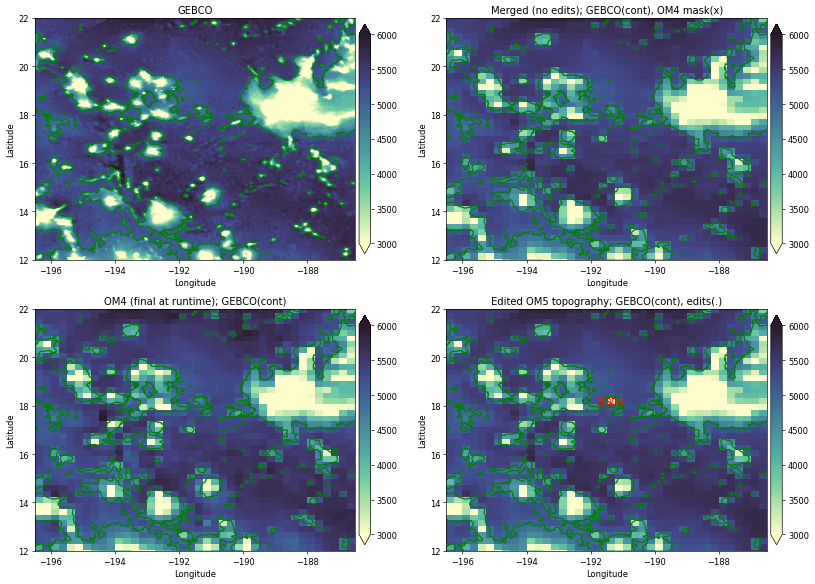

In [317]:
OM5.depth[658,434]=3000.

region = Region(168.5-360, 17, width_lon=10, width_lat=10)
map_region(region, 3000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[5000], text_depths=False);

### Gaps in Boudeuse Ridge (-151.5, -8.5)
Looks fine.

In [318]:
region = Region(-150.5, -9.5, width_lon=15, width_lat=15)
if plot_all:
    map_region(region, 2500, 6000, GEBCO, OM4, OM5, '', gebco_contours=[], text_depths=False);

### Gaps between the Line Islands, e.g. Horizon Passage at (-168, 18) and Clarion Passage at (-164, 12.5)

Gebco (js:je,is:ie) = 23999:26879,30719:33599
OM4 model (js:je,is:ie) = 542:594,510:560
OM5 model (js:je,is:ie) = 623:675,510:560
Using xlim = (-172.0, -160.0) ylim = (10.0, 22.0)


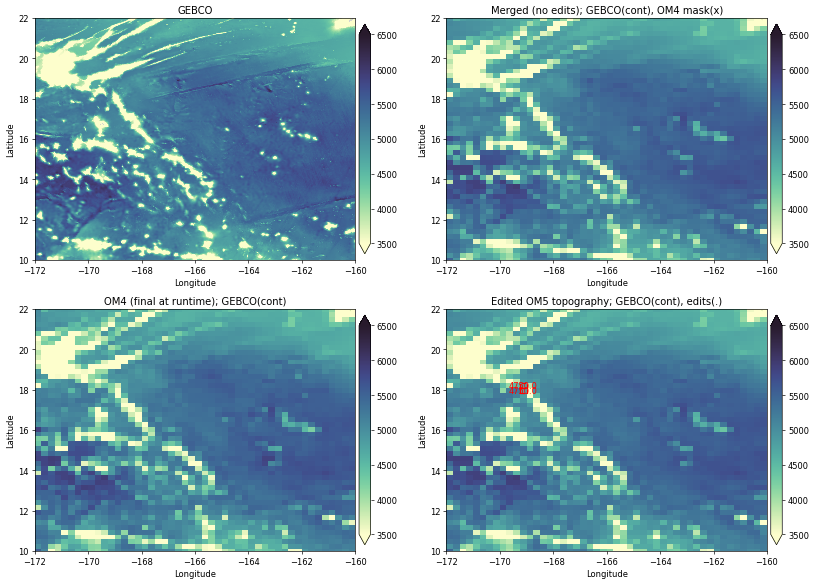

In [319]:
OM5.depth[657,523]=4750.
OM5.depth[658,523]=4750.

region = Region(-166, 16, width_lon=12, width_lat=12)
map_region(region, 3500, 6500, GEBCO, OM4, OM5, '', gebco_contours=[], text_depths=False);

### Gap in Gilbert Ridge (175, 3)
Looks fine.

In [320]:
region = Region(175-360, -3, width_lon=12, width_lat=12)
if plot_all:
    map_region(region, 3500, 7000, GEBCO, OM4, OM5, '', gebco_contours=[], text_depths=False);

### Molokai Fracture Zone (-140, 23)

Doesn't seem to be impeding flow. Could be improved but probably not worth digging out all fracture zones by hand!

In [321]:
region = Region(-140, 23, width_lon=40, width_lat=10)
if plot_all:
    map_region(region, 3500, 6000, GEBCO, OM4, OM5, '', gebco_contours=[], text_depths=False);

### Clarion Fracture Zone (-140, 17)

Doesn't seem to be impeding flow. Could be improved but probably not worth digging out all fracture zones by hand!

In [322]:
region = Region(-140, 17, width_lon=40, width_lat=10)
if plot_all:
    map_region(region, 3500, 6000, GEBCO, OM4, OM5, '', gebco_contours=[], text_depths=False);

### West Pacific trenches

Just to show the larger region

In [323]:
region = Region(140-360, 11, width_lon=15, width_lat=40)
if plot_all:
    map_region(region, 3500, 7000, GEBCO, OM4, OM5, '', gebco_contours=[], text_depths=False);

### Yap-Mariana Junction (140, 11)

Gebco (js:je,is:ie) = 23879:24599,18840:19560
OM4 model (js:je,is:ie) = 540:554,312:326
OM5 model (js:je,is:ie) = 621:635,312:326
Using xlim = (-221.5, -218.5) ylim = (9.5, 12.5)


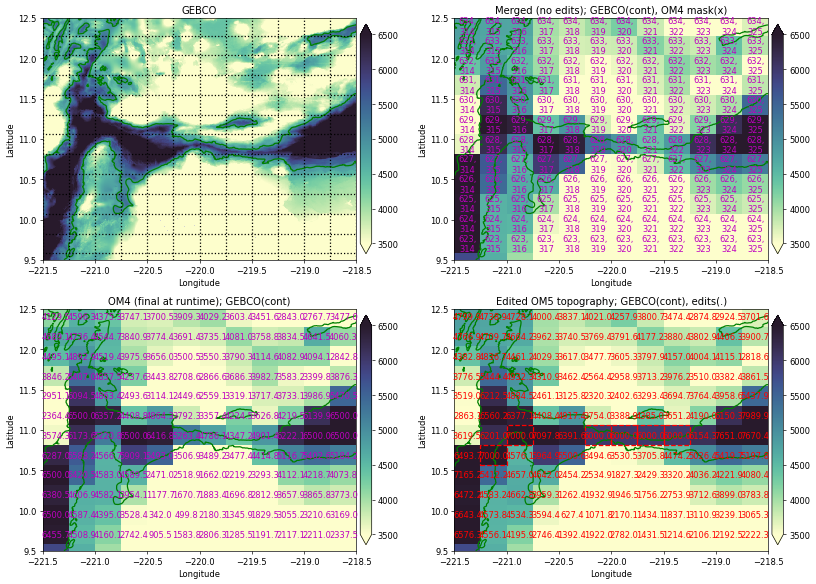

In [324]:
OM5.depth[628, 322]=6000.
OM5.depth[628, 321]=6000.
OM5.depth[628, 320]=6000.
OM5.depth[628, 320]=6000.
OM5.depth[628, 319]=6000.
OM5.depth[628, 316]=7000.
OM5.depth[627, 315]=7000.

region = Region(140-360, 11, width_lon=3, width_lat=3)
map_region(region, 3500, 6500, GEBCO, OM4, OM5, '', gebco_contours=[5000], text_depths=True);

### Yap Trench

Gebco (js:je,is:ie) = 23159:24119,18000:18960
OM4 model (js:je,is:ie) = 528:546,298:316
OM5 model (js:je,is:ie) = 609:627,298:316
Using xlim = (-225.0, -221.0) ylim = (6.5, 10.5)


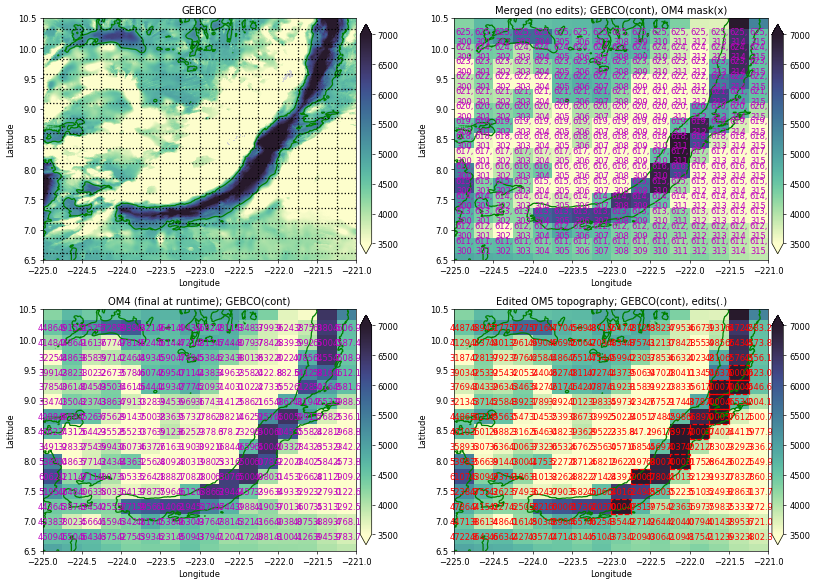

In [325]:
OM5.depth[622, 314]=7000.
OM5.depth[621, 314]=7000.
OM5.depth[621, 313]=7000.
OM5.depth[620, 313]=7000.
OM5.depth[619, 313]=7000.
OM5.depth[618, 312]=7000.
OM5.depth[616, 311]=7000.
OM5.depth[616, 311]=7000.
OM5.depth[615, 309]=7000.
OM5.depth[613, 308]=7000.

region = Region(137-360, 8.5, width_lon=4, width_lat=4)
map_region(region, 3500, 7000, GEBCO, OM4, OM5, '', gebco_contours=[5000], text_depths=True);

### Mariana Trench

Gebco (js:je,is:ie) = 25919:26639,20640:21360
OM4 model (js:je,is:ie) = 575:590,342:356
OM5 model (js:je,is:ie) = 656:671,342:356
Using xlim = (-214.0, -211.0) ylim = (18.0, 21.0)


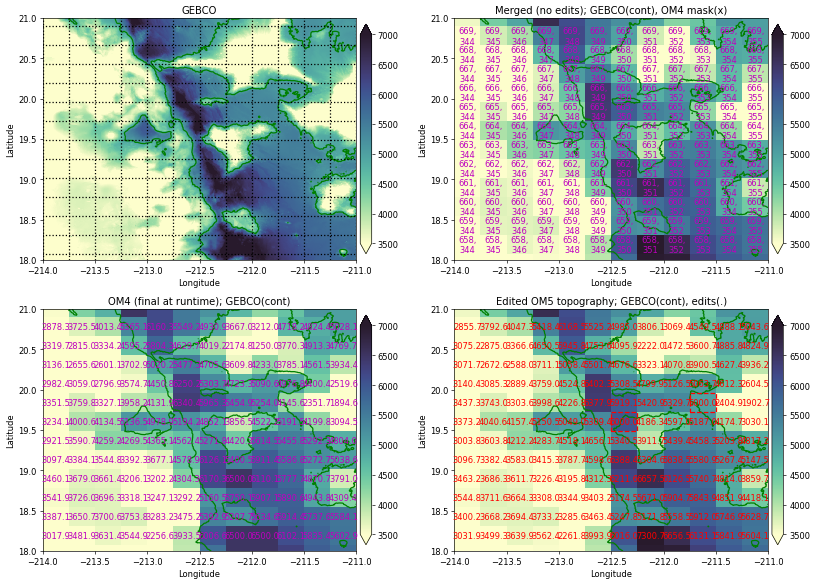

In [326]:
OM5.depth[664, 350]=6000.
OM5.depth[665, 353]=5000.

region = Region(-212.5, 19.5, width_lon=3, width_lat=3)
map_region(region, 3500, 7000, GEBCO, OM4, OM5, '', gebco_contours=[5000], text_depths=True);

### Channel near southern boundary of the Philippine Basin

### Passages between and around Hess Rise and Hawaiian Ridge (-177, 31)
Looks fine.

In [327]:
region = Region(177-360, 34, width_lon=20, width_lat=20)
if plot_all:
    map_region(region, 3000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[], text_depths=False);

In [328]:
region = Region(-177, 31, width_lon=10, width_lat=10)
if plot_all:
    map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[5000], text_depths=False);

### Main Gap (Nintoku Passage) at (173, 39)
Main gap and smaller passages all well-resolved.

In [329]:
region = Region(173-360, 39, width_lon=10, width_lat=10)
if plot_all:
    map_region(region, 2000, 6000, GEBCO, OM4, OM5, '', gebco_contours=[5000], text_depths=False);

### Passage out of Aleutian Trench at (-168, 51)

### Near Strait?

### Kamchatka Strait (-164, 56)

### Galapagos triple junction (-101, 2)

### Quebrada Fracture Zone (-103, 3.5)

### Wilkes Fracture Zone (-105, -10.5)

### Yaquina Fracture Zone (-109, -6.5)

### Gap in Galapagos Ridge (-105, -17)

### Valdivia Fracture Zone (-87, -41)

### Chile Fracture Zone (-99, -36)

### Sill between Sala-y-Gomez and Nazca Ridges (-84, -24)

### Peru-Chile Trench

## 3.3.4 NADW

### Denmark Strait (-24, 67)
Well-resolved

In [330]:
region = Region(-27, 66., width_lon=3, width_lat=3)
if plot_all:
    map_region(region, 250, 2000, GEBCO, OM4, OM5, '', gebco_contours=[750], text_depths=False);

### Iceland-Faroe Ridge

### Faroe-Shetland Channel

### Wyville Thomson Ridge overflow

### Faroe Bank Channel (already treated in another notebook)

### Dense overflows over Iceland-Faroe Ridge

### Gaps in the Reykjanes Ridge

### Charlie-Gibbs Fracture Zone

### Milne Seamount Complex

### Deep, narrow channel escaping southeast Labrador Basin along the western boundary

### Deep Fracture Zones crossing Mid-Altantic Ridge near (?, 11) and (?, 0)

### Fram Strait

### Deep gaps in the Lomonosov Ridge near the North Pole, e.g. sill near (156, 88.7)

### Cooperation Gap within the Alpha-Mendeleev Ridge

### Baffin Bay sills (?)